## Курсовой проект: "Предсказание цен на жильё"

In [169]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
%matplotlib inline

**Загрузка данных для расчёта проекта**

In [170]:
X = pd.read_csv('train.csv')
y = pd.DataFrame({'Price': X['Price']})

In [171]:
X.drop(columns='Price', inplace=True)

In [172]:
X_test = pd.read_csv('test.csv')

In [173]:
X.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B


**Описание датасета:**

**Id** - идентификационный номер квартиры<br>
**DistrictId** - идентификационный номер района<br>
**Rooms** - количество комнат<br>
**Square** - площадь<br>
**LifeSquare** - жилая площадь<br>
**KitchenSquare** - площадь кухни<br>
**Floor** - этаж<br>
**HouseFloor** - количество этажей в доме<br>
**HouseYear** - год постройки дома<br>
**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности<br>
**Social_1, Social_2, Social_3** - социальные показатели местности<br>
**Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья<br>
**Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров<br>
**Price** - цена квартиры<br>

**Определение наличия пропусков**

In [174]:
X.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [175]:
#данные признаков(там где пропуски) 'LifeSquare' и 'Healthcare_1' в дальнейшем будут заменены на медиану

**Выявление выбросов аналитическим методом**

In [176]:
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [177]:
#1. обращаем внимание на значения минимум и максимум - выбираем квантиль 2,5% от минимума и максимума и заменим
# данные значения медианой
#2. все нулевые значения заменяем медианой
#3. сравниваем квадратные метры: общая плащадь, жилая и кухня. После преобразований общая плащадь должна быть
# больше или равна сумме плащадей жилой и кухни
#4. сравниваем этажи: жилой этаж не должен превышать этажность дома
#5. выявляем категориальные признаки с буквенными данным для дальнейшей замены на тип boolean(бинарные)

**Создание класса для преобразования данных**

In [178]:
class DataPrepare:


    def __init__(self):
        self.medians = None
        self.HouseYear_median = None
        self.Rooms_median = None
        self.Square_median = None
        self.LifeSquare_median = None
        self.KitchenSquare_median = None
        self.HouseFloor_median = None
        
    
    def fit(self, df):
        # вычисление медианы и моды (только по данным файла test)
        # опытным путем было выявлено, что комбинация медианы и моды приносит более лучший результат
        self.medians = df[['LifeSquare', 'Healthcare_1']].median()
        self.HouseYear_mode = df['HouseYear'].mode()[0]
        self.Rooms_mode = df['Rooms'].mode()[0]
        self.Square_median = df['Square'].median()
        self.LifeSquare_median = df['LifeSquare'].median()
        self.KitchenSquare_median = df['KitchenSquare'].median()
        self.HouseFloor_mode = df['HouseFloor'].mode()[0]
        self.Floor_mode = df['Floor'].mode()[0]
        
        
    def transform(self, df):
        #замена типа данных
        df['HouseFloor'] = df['HouseFloor'].astype(int)
        
        #заполнение пропусков медианой
        df[['LifeSquare', 'Healthcare_1']] = df[['LifeSquare', 'Healthcare_1']].fillna(self.medians)
        
        #заполнение выбросов модой
        #опытным путем было выявлено, что квантиль 1,25% дает лучше результат, чем 2,5%, а затем: 1% лучше чем 1,25%
        #в конечном итоге был выбран 1% для Square и 2,5% для LifeSquare
        df.loc[df['HouseYear'] > 2022, 'HouseYear'] = int(self.HouseYear_mode)
        df.loc[df['Rooms'] <= 0, 'Rooms'] = int(self.Rooms_mode)
        df.loc[df['Rooms'] > 5, 'Rooms'] = int(self.Rooms_mode)
        square_min_value = np.quantile(df['Square'], q=0.01)
        df.loc[df['Square'] < square_min_value, 'Square'] = self.Square_median
        square_max_value = np.quantile(df['Square'], q=0.99)
        df.loc[df['Square'] > square_max_value, 'Square'] = self.Square_median
        lifesquare_min_value = np.quantile(df['LifeSquare'], q=0.025)
        df.loc[df['LifeSquare'] < lifesquare_min_value, 'LifeSquare'] = self.LifeSquare_median
        lifesquare_max_value = np.quantile(df['LifeSquare'], q=0.99)
        df.loc[df['LifeSquare'] > lifesquare_max_value, 'LifeSquare'] = self.LifeSquare_median
        df.loc[df['Square'] < df['LifeSquare'], 'LifeSquare'] = df.loc[df['Square'] < df['LifeSquare'], 'Square'] #здесь идет замена из расчета, что ошибка в колонке LifeSquare и ниже мы еще раз скорректируем LifeSquare
        
        df.loc[df['KitchenSquare'] <= 4, 'KitchenSquare'] = 4
        kitchensquare_max_value = np.quantile(df['KitchenSquare'], q=0.99)
        df.loc[df['KitchenSquare'] > kitchensquare_max_value, 'KitchenSquare'] = self.KitchenSquare_median
        df.loc[df['KitchenSquare'] + df['LifeSquare'] > df['Square'], 'Square'] = df['LifeSquare'] + df['KitchenSquare']
        #df.loc[df['Square'] - df['KitchenSquare'] > df['LifeSquare'], 'LifeSquare'] = df['Square'] - df['KitchenSquare']
        df.loc[df['Floor'] <= 0, 'Floor'] = int(self.Floor_mode)
        df.loc[df['HouseFloor'] <= 0, 'HouseFloor'] = int(self.HouseFloor_mode)
        housefloor_max_value = np.quantile(df['HouseFloor'], q=0.99)
        df.loc[df['HouseFloor'] > housefloor_max_value, 'HouseFloor'] = int(self.HouseFloor_mode)
        df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor']
        
        #преобразование категориальных признаков
        df.replace({'Ecology_2': {'A': 0, 'B': 1}, 'Ecology_3': {'A': 0, 'B': 1}, 'Shops_2': {'A': 0, 'B': 1}}, inplace = True)
        
        #удаление столбца 'Id'
        df = df.drop(['Id'], axis=1)
        
        return df
    

**Разбиение основного датасета на тренировочный и валидационный и обработка данных**

In [179]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [180]:
a = DataPrepare()

In [181]:
a.fit(X) #вычисление медианы и моды ряда показателей основного датасета

In [182]:
train = a.transform(X_train) #заполнение пропусков, замена выбросов на моду и преобразование категориальных буквенных данных в бинарные(0/1)

In [183]:
train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,50.51975,1.885500,55.935852,35.042610,6.630875,7.816625,12.868625,1984.673250,0.118065,0.989625,0.972750,24.626750,5339.242125,7.920000,1026.161500,1.305375,4.192125,0.917000
std,43.74857,0.810538,16.587192,12.442676,2.556206,5.082246,6.059741,18.380668,0.119415,0.101334,0.162821,17.552313,4015.984395,23.548305,745.341668,1.489429,4.767657,0.275899
min,0.00000,1.000000,30.017128,15.001234,4.000000,1.000000,1.000000,1912.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.00000,1.000000,42.554686,27.886766,4.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000
50%,36.00000,2.000000,52.513310,32.781260,6.000000,7.000000,14.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000
75%,75.00000,2.000000,65.819023,40.368899,9.000000,11.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,4.250000,990.000000,2.000000,5.000000,1.000000
max,209.00000,5.000000,117.300024,87.623814,16.000000,25.000000,25.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


In [184]:
valid = a.transform(X_valid)#заполнение пропусков, замена выбросов на моду и преобразование категориальных буквенных данных в бинарные(0/1)

In [185]:
valid.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,49.925000,1.900000,56.921897,35.613735,6.667500,8.30000,13.260500,1985.626000,0.122026,0.993000,0.971500,24.928000,5403.818500,8.516000,1027.148500,1.376000,4.388000,0.919500
std,42.945169,0.813222,17.529497,13.449431,2.596982,5.37219,6.133225,18.511766,0.117430,0.083394,0.166438,17.455892,3970.426118,24.934326,752.111133,1.509226,4.956182,0.272134
min,0.000000,1.000000,29.300553,15.740856,4.000000,1.00000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,42.775916,28.535329,4.000000,4.00000,9.000000,1974.000000,0.033494,1.000000,1.000000,8.000000,1892.000000,0.000000,770.000000,0.000000,1.000000,1.000000
50%,34.000000,2.000000,53.043350,32.781260,6.000000,7.00000,14.000000,1977.000000,0.075779,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000
75%,75.000000,2.000000,66.679813,40.734035,9.000000,12.00000,17.000000,2003.000000,0.197368,1.000000,1.000000,35.000000,7227.000000,5.000000,1015.000000,3.000000,6.000000,1.000000
max,208.000000,5.000000,118.871952,100.751999,15.000000,25.00000,25.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


In [186]:
test = a.transform(X_test)#заполнение пропусков, замена выбросов на моду и преобразование категориальных буквенных данных в бинарные(0/1)

In [187]:
test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,51.279200,1.906200,56.459804,35.259930,6.625400,8.034800,12.897000,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,0.917600
std,44.179466,0.805935,16.810677,12.568364,2.530367,5.239798,6.089976,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,0.275001
min,0.000000,1.000000,30.062518,14.525566,4.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,1.000000,42.781260,28.166227,4.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,1.000000
50%,37.000000,2.000000,52.921340,32.781260,6.000000,7.000000,14.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000
75%,77.000000,2.000000,66.513818,40.621068,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000
max,212.000000,5.000000,115.553129,86.650544,15.000000,25.000000,25.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


**Уменьшение объёма памяти, который занимает датасет**

In [188]:
def reduce_mem_usage(df): #данная функция была взята из урока
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [189]:
train = reduce_mem_usage(train)
valid = reduce_mem_usage(valid)
test = reduce_mem_usage(test)

Memory usage of dataframe is 1.38 MB
Memory usage after optimization is: 0.62 MB
Decreased by 55.2%
Memory usage of dataframe is 0.35 MB
Memory usage after optimization is: 0.15 MB
Decreased by 55.2%
Memory usage of dataframe is 0.67 MB
Memory usage after optimization is: 0.19 MB
Decreased by 71.4%


**Выявление выбросов графическим методом**

In [190]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

График целевой переменной

<Figure size 720x720 with 0 Axes>

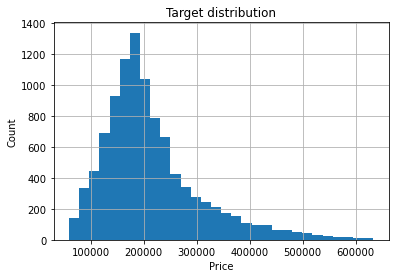

In [191]:
plt.figure(figsize = (10, 10))
y.hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.show()

In [192]:
#целевая переменная явных выбросов не имеет

array([[<AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>],
       [<AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Ecology_2'}>,
        <AxesSubplot:title={'center':'Ecology_3'}>,
        <AxesSubplot:title={'center':'Social_1'}>],
       [<AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>],
       [<AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Shops_2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

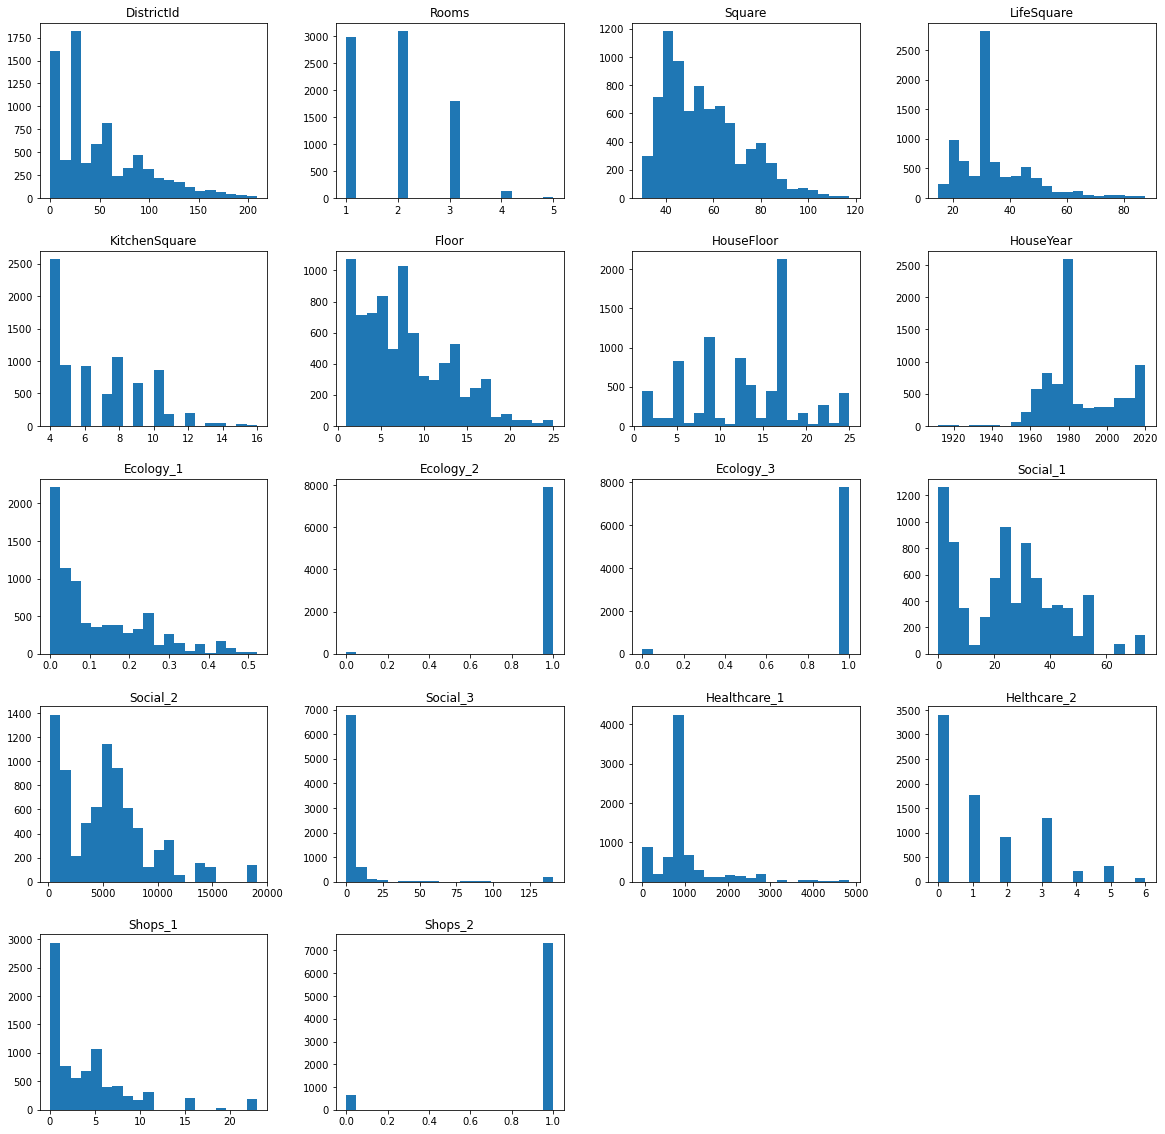

In [193]:
train.hist(figsize=(20, 20), bins=20, grid=False)

In [194]:
#явных выбросов не выявлено, изменять данные не будем(позже, для поиска лучшей подгодовки данных из датасета были 
# удалены 'Shops_2', 'Social_3', 'Ecology_2', 'Ecology_3', а также были добавлены новые признаки на основе 'DistrictId', 
# но данные изменения не принесли улучшений в расчетах, поэтому датасету был возвращён первоначальный вид)

**Стандартизация значений параметров датасета**

In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)

StandardScaler()

In [196]:
def std(df):#функция для стандартизации датафрейма
    df = pd.DataFrame(scaler.transform(df), columns = df.columns)
    return df

In [197]:
train_std = std(train)
test_std = std(test)
valid_std = std(valid)

In [198]:
train_std.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,1.039648,0.141273,0.274070,-0.269339,1.318100,-0.160692,-0.803488,0.833904,-0.644425,0.10239,0.167372,1.616597,2.378833,-0.166477,-0.169277,-0.205041,-0.040300,0.300853
1,-0.537645,-1.092553,-1.022572,-0.487650,1.318100,-0.357468,1.506986,1.704438,0.781658,0.10239,0.167372,-0.890351,-0.858434,-0.336351,-0.169277,-0.876481,-0.669579,0.300853
2,-1.017691,0.141273,0.610511,0.669621,1.318100,0.232859,2.002088,1.595621,1.048000,0.10239,0.167372,-1.118256,-0.940113,-0.336351,-0.652307,-0.876481,-0.879339,0.300853
3,-0.629083,1.375099,1.271435,-0.181753,-1.029275,0.232859,0.681817,-0.417489,-0.354138,0.10239,0.167372,-1.061280,-0.971738,-0.208945,-0.169277,-0.876481,-0.459820,0.300853
4,1.336819,1.375099,1.246107,1.190575,1.318100,-0.947795,0.681817,0.779495,-0.988762,0.10239,0.167372,0.021266,-0.077755,-0.166477,-1.315132,-0.205041,-0.669579,0.300853


In [199]:
valid_std.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,-1.086269,1.375099,3.318081,5.218452,1.709329,-0.160692,0.351749,1.541213,-0.562490,0.10239,0.167372,1.046836,1.315266,-0.293882,-1.336600,0.466399,-0.250060,0.300853
1,-0.651942,-1.092553,1.902175,-0.181753,-1.029275,1.610289,0.681817,-0.417489,0.003952,0.10239,0.167372,0.306147,0.216090,-0.293882,0.210438,-0.205041,-0.879339,0.300853
2,2.319769,0.141273,-0.921609,-1.025080,0.144413,-0.357468,-0.638454,-1.124798,-0.636760,0.10239,0.167372,0.704980,0.377704,3.231008,1.226143,0.466399,0.169460,0.300853
3,-0.217615,-1.092553,-0.785357,-1.134817,0.926871,1.216738,0.516783,-0.254264,0.477268,0.10239,0.167372,0.648004,1.174320,-0.208945,-0.169277,-0.205041,-0.879339,0.300853
4,0.056697,-1.092553,-1.255725,-1.035793,0.926871,-0.554243,-0.143353,-0.961573,-0.573065,0.10239,0.167372,0.534051,0.602569,-0.336351,-1.069592,-0.205041,-0.250060,0.300853


In [200]:
test_std.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,-0.149037,-1.092553,-1.150853,-1.281832,-0.638046,-0.554243,-0.638454,-0.798348,-0.686249,0.10239,0.167372,-0.035710,-0.239369,-0.336351,0.013201,-0.205041,-0.669579,0.300853
1,0.262431,-1.092553,-0.207519,0.598888,1.318100,-0.160692,0.681817,1.758846,-0.384464,0.10239,0.167372,-1.289184,-1.172947,-0.293882,-0.169277,-0.876481,-0.879339,-3.323882
2,-0.537645,0.141273,0.212697,-0.181753,0.926871,2.200616,1.011885,-0.417489,0.781658,0.10239,0.167372,-0.890351,-0.858434,-0.336351,-0.169277,-0.876481,-0.669579,0.300853
3,-0.629083,1.375099,-0.379221,-0.092332,-0.246817,-1.144570,-1.793691,-1.070390,-0.870905,0.10239,0.167372,-1.289184,-1.211296,-0.336351,-0.169277,-0.876481,-0.879339,0.300853
4,0.536743,-1.092553,-0.126539,-0.181753,-1.029275,0.036084,0.681817,-0.417489,1.603029,0.10239,0.167372,0.591027,0.591612,-0.166477,-0.048520,-0.876481,0.379219,0.300853


**Построение и выбор модели (в проекте останется только лучшая из нескольких моделей)**

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [202]:
def evaluate_preds(true_values, pred_values):#данная функция была взята из урока
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)))
    
    plt.figure(figsize=(8,8))
    
    plt.scatter(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    plt.show()

In [203]:
#были проанализированны следующие модели:
#LinearRegression
#RandomForestRegressor
#GradientBoostingRegressor
#для моделей RandomForestRegressor и GradientBoostingRegressor при помощи GridSearchCV были определены лучшие
#показатели из 70 возможных
#В конченом итоге была выбрана модель с лучшим показателем R2 - GradientBoostingRegressor

R2:	0.888


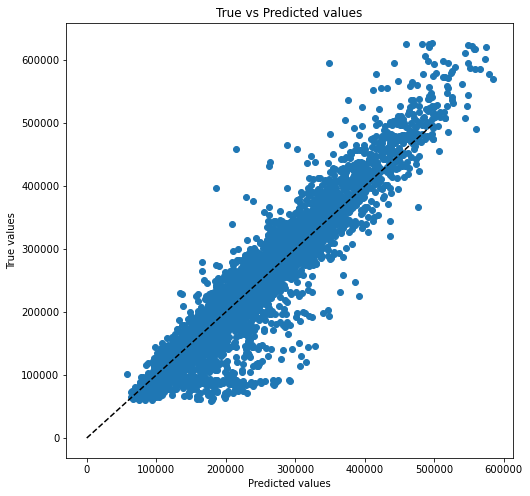

In [204]:
gb_model = GradientBoostingRegressor(max_depth=7,
                                     min_samples_leaf=25,
                                     random_state=42,  
                                     n_estimators=200)
gb_model.fit(train, y_train)
y_train_preds = gb_model.predict(train)
evaluate_preds(y_train, y_train_preds)

R2:	0.743


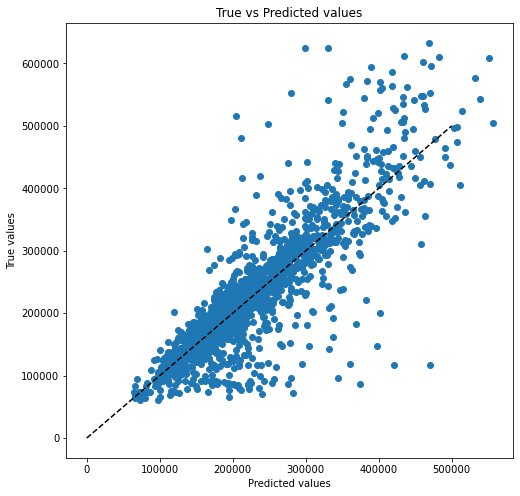

In [205]:
y_valid_preds = gb_model.predict(valid)
evaluate_preds(y_valid, y_valid_preds)

**Расчет цен для квартир на тестовом датасете**

In [206]:
y_test = gb_model.predict(test)

In [207]:
y_test

array([152164.1649312 , 118433.61771089, 142098.89146429, ...,
       141695.83545706, 181559.77290831, 267832.82038824])

In [208]:
df_y_test = pd.DataFrame({'Id': X_test['Id'], 'Price': y_test})

In [209]:
df_y_test.head()

,Id,Price
0,4567,152164.164931
1,5925,118433.617711
2,960,142098.891464
3,3848,169997.006169
4,746,179741.508285


In [210]:
df_y_test.to_csv('test_price_final_04.csv', index = False)